<a href="https://colab.research.google.com/github/wolffg7/deeplearning1/blob/main/AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop


from urllib.request import urlretrieve 
from collections import Counter 


## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [21]:
urlretrieve("https://www.gutenberg.org/cache/epub/70590/pg70590.txt", 'darkrecess.txt')
darkrecess = open("darkrecess.txt", encoding='utf-8').read().lower()

urlretrieve("https://www.gutenberg.org/cache/epub/70594/pg70594.txt", 'europe.txt')
europe = open("europe.txt", encoding='utf-8').read().lower()

print(darkrecess[:100])
print(europe[:100]) 

﻿the project gutenberg ebook of dark recess, by george o. smith

this ebook is for the use of anyone
﻿the project gutenberg ebook of beautiful europe--the engadine, by
spencer musson

this ebook is for


## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

Text(0.5, 1.0, 'Author 2 characters')

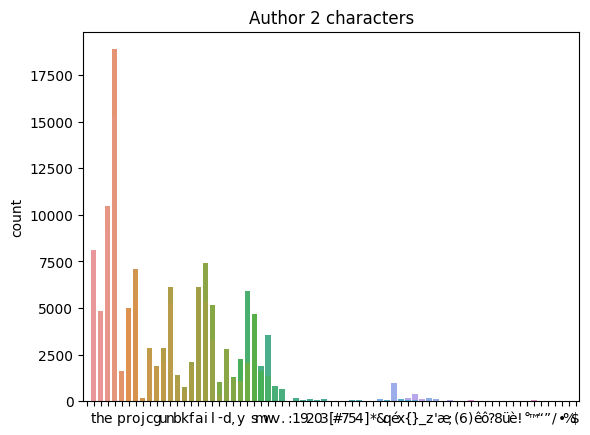

In [13]:
dr = Counter(darkrecess)
ax = sns.countplot(x=list(dr.elements()))
plt.show() 

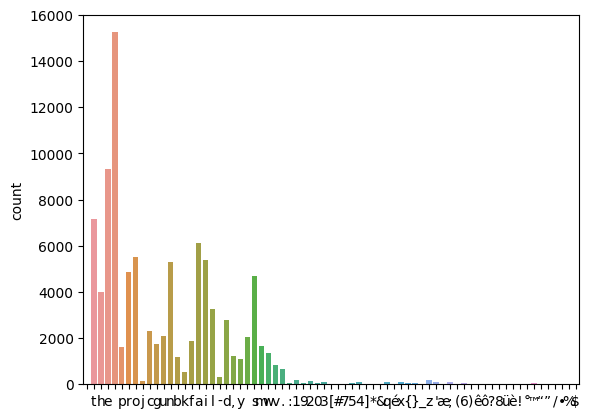

In [17]:
e = Counter(europe)  
ax2 = sns.countplot(x=list(e.elements()))
plt.show()

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [29]:
sequence_length = 60 

darkrecess_chars = list(set(darkrecess))
europe_chars = list(set(europe)) 

all_chars = set(darkrecess_chars) | set(europe_chars)

alphabet_length = len(all_chars) 


72


In [ ]:




# Convert the characters into one-hot encodings
def char_to_onehot(char):
    onehot = np.zeros(len(alphabet))
    onehot[char_to_index[char]] = 1
    return onehot

# Create sliding windows of size sequence_length and extract the one-hot encodings and labels
data = []
for text, label in texts:
    for i in range(len(text) - sequence_length):
        sequence = text[i:i + sequence_length]
        data.append(([char_to_onehot(char) for char in sequence], label))

# Shuffle the data
np.random.shuffle(data)

# Split the data into training and validation sets
split = int(0.8 * len(data))
train_data = data[:split]
val_data = data[split:]

# Convert the data into a 3D NumPy array
train_X = np.zeros((len(train_data), sequence_length, len(alphabet)))
train_Y = np.zeros(len(train_data))
val_X = np.zeros((len(val_data), sequence_length, len(alphabet)))
val_Y = np.zeros(len(val_data))

for i, (sequence, label) in enumerate(train_data):
    train_X[i] = sequence
    train_Y[i] = label
    
for i, (sequence, label) in enumerate(val_data):
    val_X[i] = sequence
    val_Y[i] = label

## Data splitting
Split the data into train, validate and test sets. Make 

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

## Model training
Train the model and apply early stopping.

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

## Confusion matrix
Calculate and display the confusion matrix.